In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
date = "20190524_split"

live = f"data/processed/{date}/IJV/live/{date}_1_1.csv"
phantom = f"data/processed/{date}/IJV/phantom/{date}.csv"


In [7]:
li = pd.read_csv(live)
ph = pd.read_csv(phantom)


In [8]:
li.head(1), ph.head(1)

(   wavelength       max        min
 0         660  586.8894  582.92166,
    wavelength          c            e           h            i             k  \
 0         660  18.499247  7796.088835  294.185776  2740.298812  14430.514994   
 
              n  
 0  6952.514988  )

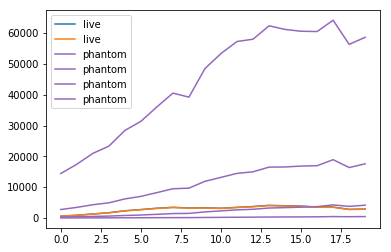

In [15]:
plt.plot(li.values[:, 1:], label="live")
plt.plot(ph.values[:, [1,3,4,5]], label="phantom", color="C4")
plt.legend()
plt.show()

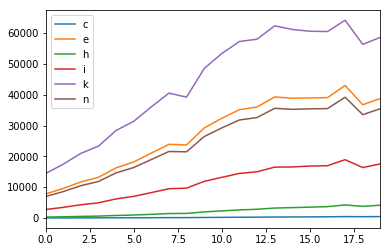

In [16]:
ph.iloc[:, 1:].plot()

## 結論:拍攝值有被包住

In [17]:
date = "20190524_split"

live = f"data/calibrated/{date}/IJV/{date}_1_1.csv"
phantom = f"CHIKEN/20190621_sim_chik.csv"


In [18]:
li = pd.read_csv(live)
ph = pd.read_csv(phantom)

In [19]:
li.head(1)

,wavelength,max,min
0,660,8.538986e-10,8.452709e-10


In [20]:
ph.head(1)

,wl,c,h,i,k
0,660,1.804138e-12,4.355970e-10,7.613851e-09,3.916641e-08


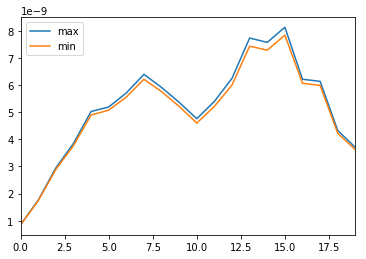

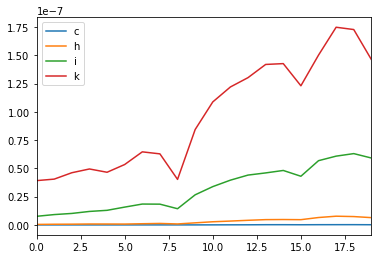

In [21]:
li.iloc[:, 1:].plot()
ph.iloc[:, 1:].plot()
plt.show()

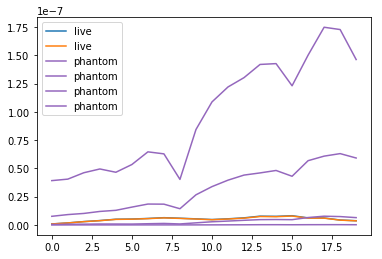

In [23]:
plt.plot(li.values[:, 1:], label="live")
plt.plot(ph.values[:, 1:], label="phantom", color="C4")
plt.legend()
plt.show()

In [34]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

from random import uniform
from glob import glob 
from copy import deepcopy

from engine import Engine, args_template
import time
engine = Engine("train/model/20190619_001.pt")
wl = [i for i in range(660, 851, 10)]
x_range = {
    "sb": (0, 0.1),
    "ss": (0.5, 1.0),
    "sw": (0, 1.0),
    "sf": (0, 1.0),
    "sm": (0, 1.0),

    "fb": (0, 0.1),
    "fs": (0, 1.0),
    "ff": (0.9, 1),

    "mb": (0.005, 0.1),
    "ms": (0.0, 1.0),
    "mw": (0.0, 1.0),

    "is": (0.4, 0.8),

    "cs": (0.85, 1.0),
}
def get_args(geo_max, geo_min):
    
    # absorption
    sb = uniform(x_range["sb"][0], x_range["sb"][1])
    ss = uniform(x_range["ss"][0], x_range["ss"][1])
    sw = uniform(x_range["sw"][0], max(x_range["sw"][0], min(x_range["sw"][1], 1-sb)))
    sf = uniform(x_range["sf"][0], max(x_range["sf"][0], min(x_range["sf"][1], 1-sb-sw)))
    sm = 1-sb-sw-sf
    
    fb = uniform(x_range["fb"][0], x_range["fb"][1])
    fs = uniform(x_range["fs"][0], x_range["fs"][1])
    ff = 1 - fb
    
    mb = uniform(x_range["mb"][0], x_range["mb"][1])
    ms = uniform(x_range["ms"][0], x_range["ms"][1])
    mw = uniform(x_range["mw"][0], max(x_range["mw"][0], min(x_range["mw"][1], 1-mb)))
    mc = 1 - mb - mw
    is_ = uniform(x_range["is"][0], x_range["is"][1])
    cs = uniform(x_range["cs"][0], x_range["cs"][1])
    
    # scattering
#     s_musp = uniform(29.7, 48.9)
#     s_bmie = uniform(0.705, 2.453)
    
#     f_musp = uniform(13.7, 35.8)
#     f_bmie = uniform(0.385, 0.988)
    
#     m_musp = uniform(9.8, 13.0)
#     m_bmie = uniform(0.926, 2.82)
    
#     i_musp = uniform(0.1, 1)
#     i_bmie = uniform(1, 1)
    
#     c_musp = uniform(0.1, 1)
#     c_bmie = uniform(1, 1)
    
    # scattering 亂調整
    s_musp = uniform(0, 0.9)
    s_bmie = uniform(0.705, 2.453)
    
    f_musp = uniform(0, 3.8)
    f_bmie = uniform(0.385, 0.988)
    
    m_musp = uniform(0, 1.0)
    m_bmie = uniform(0.926, 2.82)
    
    i_musp = uniform(0.1, 1)
    i_bmie = uniform(1, 1)
    
    c_musp = uniform(0.1, 1)
    c_bmie = uniform(1, 1)
    
    
        
    args_max = {
        "skin":{
            "blood_volume_fraction": sb,
            "ScvO2": ss,
            "water_volume": sw,
            "fat_volume": sf,
            "melanin_volume": sm,
            "collagen_volume": 0,
            "n": 1.40,
            "g": 0.71,
            "muspx": s_musp,
            "bmie": s_bmie
        },

        "fat":{
            "blood_volume_fraction": fb,
            "ScvO2": fs,
            "water_volume": 0,
            "fat_volume": ff,
            "melanin_volume": 0,
            "collagen_volume": 0,
            "n": 1.40,
            "g": 0.90,
            "muspx": f_musp,
            "bmie": f_bmie
        },

        "muscle":{
            "blood_volume_fraction": mb,
            "ScvO2": ms,
            "water_volume": mw,
            "fat_volume": 0,
            "melanin_volume": 0,
            "collagen_volume": mc,
            "n": 1.40,
            "g": 0.9,
            "muspx": m_musp,
            "bmie": m_bmie
        },

        "IJV":{
            "blood_volume_fraction": 1.0,
            "ScvO2": is_,
            "water_volume": 0,
            "fat_volume": 0,
            "melanin_volume": 0,
            "collagen_volume": 0,
            "n": 1.40,
            "g": 0.90,
            "muspx": i_musp,
            "bmie": i_bmie
        },

        "CCA":{
            "blood_volume_fraction": 1.0,
            "ScvO2": cs,
            "water_volume": 0,
            "fat_volume": 0,
            "melanin_volume": 0,
            "collagen_volume": 0,
            "n": 1.40,
            "g": 0.94,
            "muspx": c_musp,
            "bmie": c_bmie
        },
        "geometry": geo_max
    }
    args_min = {
        "skin":{
            "blood_volume_fraction": sb,
            "ScvO2": ss,
            "water_volume": sw,
            "fat_volume": sf,
            "melanin_volume": sm,
            "collagen_volume": 0,
            "n": 1.40,
            "g": 0.71,
            "muspx": s_musp,
            "bmie": s_bmie
        },

        "fat":{
            "blood_volume_fraction": fb,
            "ScvO2": fs,
            "water_volume": 0,
            "fat_volume": ff,
            "melanin_volume": 0,
            "collagen_volume": 0,
            "n": 1.40,
            "g": 0.90,
            "muspx": f_musp,
            "bmie": f_bmie
        },

        "muscle":{
            "blood_volume_fraction": mb,
            "ScvO2": ms,
            "water_volume": mw,
            "fat_volume": 0,
            "melanin_volume": 0,
            "collagen_volume": mc,
            "n": 1.40,
            "g": 0.9,
            "muspx": m_musp,
            "bmie": m_bmie
        },

        "IJV":{
            "blood_volume_fraction": 1.0,
            "ScvO2": is_,
            "water_volume": 0,
            "fat_volume": 0,
            "melanin_volume": 0,
            "collagen_volume": 0,
            "n": 1.40,
            "g": 0.90,
            "muspx": i_musp,
            "bmie": i_bmie
        },

        "CCA":{
            "blood_volume_fraction": 1.0,
            "ScvO2": cs,
            "water_volume": 0,
            "fat_volume": 0,
            "melanin_volume": 0,
            "collagen_volume": 0,
            "n": 1.40,
            "g": 0.94,
            "muspx": c_musp,
            "bmie": c_bmie
        },
        "geometry": geo_min
    }
    return args_max, args_min

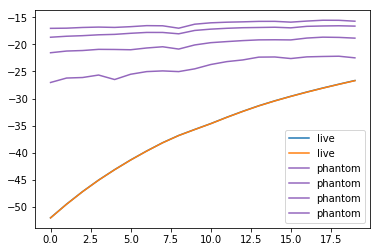

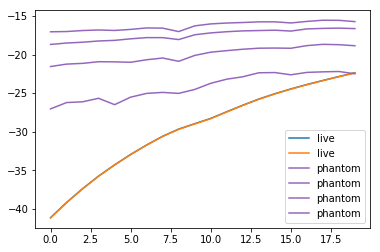

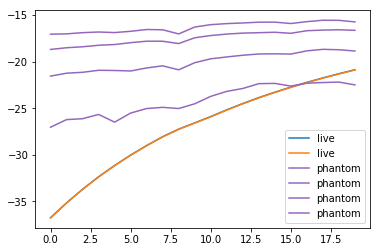

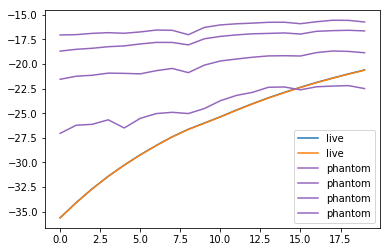

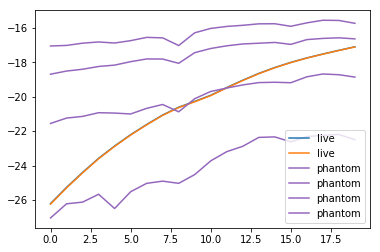

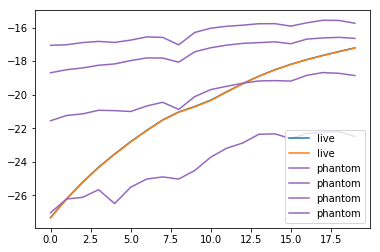

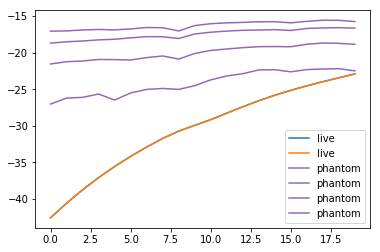

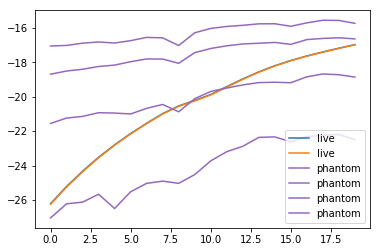

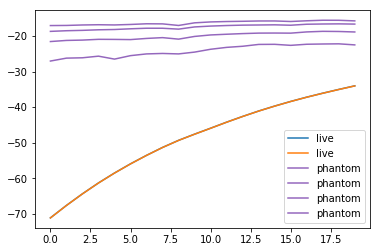

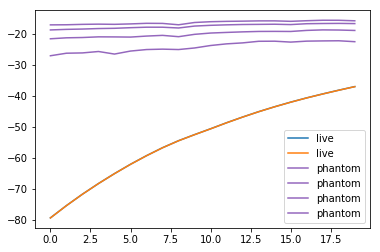

In [36]:
for i in range(10):
    args_max, args_min = get_args(
                geo_max=[1.27, 1.00, 7.71, 14.95, 3.53, 23.86, 7.68],
                geo_min=[1.27, 1.00, 7.10, 14.95, 3.53, 23.86, 7.68]
            )

    pred_max = engine.get_spectrum(args_max)
    pred_min = engine.get_spectrum(args_min)
    plt.plot(np.log(pred_max), label="live")
    plt.plot(np.log(pred_min), label="live")

    plt.plot(np.log(ph.values[:, 1:]), label="phantom", color="C4")
    plt.legend()
    plt.show()
    time.sleep(1)